In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y = make_circles(n_samples=500,noise=0.052)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


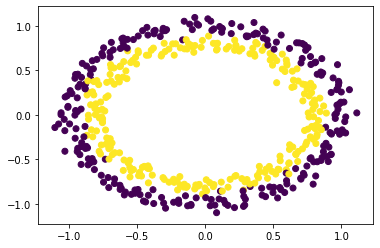

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
def phi(X):
    
    """Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2+X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_
    

In [6]:
X_ = phi(X)

(500, 3)


In [7]:
print(X[:3,:])

[[-0.23868593  0.79893611]
 [ 0.68246116 -0.41176041]
 [-0.06851745 -0.78858619]]


In [8]:
print(X_[:3,:])

[[-0.23868593  0.79893611  0.69526988]
 [ 0.68246116 -0.41176041  0.63529988]
 [-0.06851745 -0.78858619  0.62656282]]


In [9]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

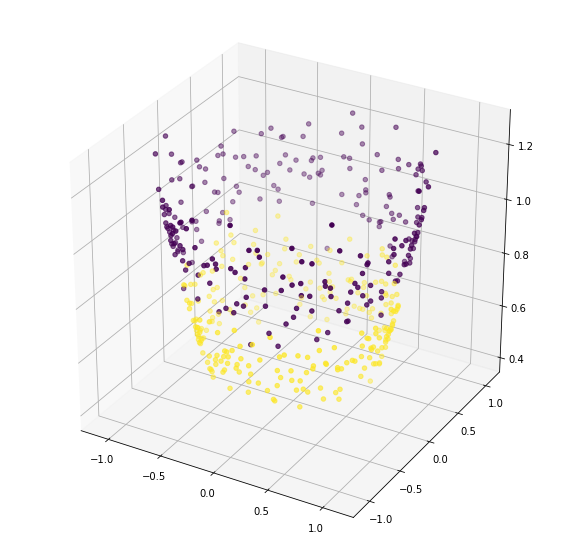

In [10]:
ax = plot3d(X_)

### Logistic Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
lr = LogisticRegression()

In [13]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy X(2D) is 43.4000


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Logistic Classifier on Higher Dimension Space 

In [14]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 97.6000


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

### Visualise the Decision Surface 

In [15]:
lr.fit(X_,Y)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
wts = lr.coef_

In [17]:
bias = lr.intercept_

In [18]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [19]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81180845 0.80401274 0.79621703 0.78842132]
 [0.81905196 0.81125625 0.80346054 0.79566483]
 [0.82629547 0.81849976 0.81070405 0.80290834]
 [0.83353898 0.82574327 0.81794756 0.81015185]]


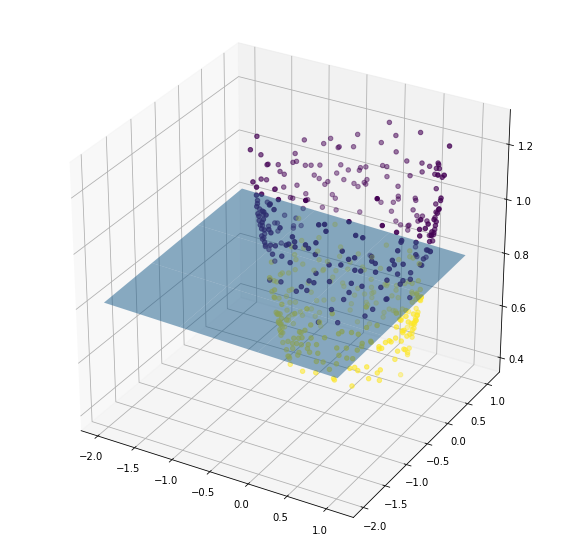

In [20]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()

### Kernal Based Classification in SVM's
Types of kernals
- Linear Kernel
- RBF
- Polynomial
- Sigmoid

These transform our data so that they can writen as phi(x){high dimensional space} so that we can use langragian method

- RBF = Radial Basis Keranl - K(xi,xj) = e^(-gama|xi-xj|^2) where gama is amplitude
- Polynomial = K(xi,xj) = (gama(xi.T)xj+r)^c where c is degree of polynomial
- Sigmoid = K(xi,xj) = (1 - e^(-2(y*xi*xj+r)))/(1+e^(-2(y*xi*xj+r)))

For more info https://towardsdatascience.com/kernel-function-6f1d2be6091

**Kernel trick** is method of using a linear classifier to solve a non-linear problem. It transforms the linearly inseperable data into linearly seperable one.

In [21]:
from sklearn import svm
# this supports three svm SVC,NUSVC and LinearSVC
#LinearSVC based on Pagoses implementation
# In SVC Kernel is used

In [23]:
#Linear Kernel
svc = svm.SVC(kernel='linear')
svc.fit(X,Y)
svc.score(X,Y)

0.504

In [24]:
# RBF Kernel
svc = svm.SVC()
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.976

In [26]:
# Polynomial Kernel
svc = svm.SVC(kernel='poly')
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.566

In [28]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))
    
svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

0.976

### Mathematical Formulation
https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
https://scikit-learn.org/stable/modules/svm.html